# Analysis of judge perceptions
author: Judith Abécassis
data is from [this paper](https://onlinelibrary.wiley.com/doi/abs/10.1111/ajps.12357).

Here is some of my code for the example presented in class. The code is not necessarily always the shortest possible, the important thing is to get where you want! I make it available so you can also play around with data, try to do things your own way, to better master the concepts seen in class.

In [1]:
#Load useful libraries
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import CompareMeans, ztest 
import seaborn as sns
sns.set_context('poster')


Bad key "text.kerning_factor" on line 4 in
/Users/JudithAbecassis/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
judges = pd.read_csv('judges.csv', sep='\t')
print(judges.shape)
judges.head()

(1234, 10)


,ID,age,gender,party,eidretain,eidideology,treatment,respideol,distideol,educ
0,R_poaUMG1G7YLrKKt,25-34,Female,Strong Democrat,1.0,7.0,1.0,2.0,5.0,Some college
1,R_1JDgtTKveX3DbOt,45-54,Female,Republican Leaner,2.0,6.0,1.0,5.0,1.0,Associate degree
2,R_2Yb8AZwaXDyvkId,25-34,Female,Strong Democrat,2.0,5.0,1.0,2.0,3.0,Some college
3,R_RV5eAo3HEWPmI7L,18-24,Female,Not so strong Republican,3.0,5.0,0.0,6.0,1.0,Some college
4,R_2y1qt5Wn0OfgZSj,25-34,Female,Independent/Other,3.0,5.0,0.0,4.0,1.0,Associate degree


In [3]:
mean_treated = judges[judges.treatment==1].eidretain.mean()
print(mean_treated)

2.167235494880546


In [4]:
mean_control = judges[judges.treatment==0].eidretain.mean()
print(mean_control)

2.3808724832214767


In [5]:
ate_hat = mean_treated - mean_control
print(ate_hat)

-0.2136369883409306


In [8]:
# Neyman variance estimator for the sampling variance
var_ate_hat = judges[judges.treatment==1].eidretain.var() / len(judges[judges.treatment==1]) + \
                judges[judges.treatment==0].eidretain.var() / len(judges[judges.treatment==0])
print(var_ate_hat)

# Standard error 
se_ate_hat = np.sqrt(var_ate_hat)
print(se_ate_hat)


0.0019329718637831018
0.04396557589504659


In [9]:
# Asymptotic confidence interval
ci_95 = [ate_hat - sps.norm.ppf(.975)*se_ate_hat,
         ate_hat + sps.norm.ppf(.975)*se_ate_hat]
print(ci_95)

[-0.29980793365478425, -0.12746604302707693]


In [16]:
# Test statistic under the null of 0 ATE
t_stat = (ate_hat - 0)/se_ate_hat
print(t_stat)
#> [1] 3.082
# Two-sided p-value under the null (Z-test)
p_value = 1-sps.norm.cdf(np.abs(t_stat)) +\
    sps.norm.cdf(-np.abs(t_stat)) # lower tail #  upper tail
print(p_value)
#> [1] 0.002058
# same calculation in a single line
p_value = 2*sps.norm.cdf(-np.abs(t_stat))
print(p_value)

-4.859187762055452
1.1786831118074757e-06
1.178683111835019e-06


In [17]:
judges.head()

,ID,age,gender,party,eidretain,eidideology,treatment,respideol,distideol,educ
0,R_poaUMG1G7YLrKKt,25-34,Female,Strong Democrat,1.0,7.0,1.0,2.0,5.0,Some college
1,R_1JDgtTKveX3DbOt,45-54,Female,Republican Leaner,2.0,6.0,1.0,5.0,1.0,Associate degree
2,R_2Yb8AZwaXDyvkId,25-34,Female,Strong Democrat,2.0,5.0,1.0,2.0,3.0,Some college
3,R_RV5eAo3HEWPmI7L,18-24,Female,Not so strong Republican,3.0,5.0,0.0,6.0,1.0,Some college
4,R_2y1qt5Wn0OfgZSj,25-34,Female,Independent/Other,3.0,5.0,0.0,4.0,1.0,Associate degree


In [18]:
# create columns with the potential outcomes
judges = judges.assign(y1_obs = np.nan)
judges.loc[judges.treatment==1, 'y1_obs'] = judges.loc[judges.treatment==1, 'eidretain']
judges.head()

,ID,age,gender,party,eidretain,eidideology,treatment,respideol,distideol,educ,y1_obs
0,R_poaUMG1G7YLrKKt,25-34,Female,Strong Democrat,1.0,7.0,1.0,2.0,5.0,Some college,1.0
1,R_1JDgtTKveX3DbOt,45-54,Female,Republican Leaner,2.0,6.0,1.0,5.0,1.0,Associate degree,2.0
2,R_2Yb8AZwaXDyvkId,25-34,Female,Strong Democrat,2.0,5.0,1.0,2.0,3.0,Some college,2.0
3,R_RV5eAo3HEWPmI7L,18-24,Female,Not so strong Republican,3.0,5.0,0.0,6.0,1.0,Some college,NaN
4,R_2y1qt5Wn0OfgZSj,25-34,Female,Independent/Other,3.0,5.0,0.0,4.0,1.0,Associate degree,NaN


In [75]:
# same for y0
judges = judges.assign(y0_obs = np.nan)
judges.loc[judges.treatment==0, 'y0_obs'] = judges.loc[judges.treatment==0, 'eidretain']

judges = judges.assign(y0_fisher_null_0 = judges.y0_obs)
print(judges.head())
judges.loc[judges.treatment==1, 'y0_fisher_null_0'] = judges.loc[judges.treatment==1, 'eidretain']
print(judges.head())
judges = judges.assign(y1_fisher_null_0 = judges.y1_obs)
judges.loc[judges.treatment==0, 'y1_fisher_null_0'] = judges.loc[judges.treatment==0, 'eidretain']
judges.head()

                  ID    age  gender                     party  eidretain  \
0  R_poaUMG1G7YLrKKt  25-34  Female           Strong Democrat        1.0   
1  R_1JDgtTKveX3DbOt  45-54  Female         Republican Leaner        2.0   
2  R_2Yb8AZwaXDyvkId  25-34  Female           Strong Democrat        2.0   
3  R_RV5eAo3HEWPmI7L  18-24  Female  Not so strong Republican        3.0   
4  R_2y1qt5Wn0OfgZSj  25-34  Female         Independent/Other        3.0   

   eidideology  treatment  respideol  distideol              educ  y1_obs  \
0          7.0        1.0        2.0        5.0      Some college     1.0   
1          6.0        1.0        5.0        1.0  Associate degree     2.0   
2          5.0        1.0        2.0        3.0      Some college     2.0   
3          5.0        0.0        6.0        1.0      Some college     NaN   
4          5.0        0.0        4.0        1.0  Associate degree     NaN   

   y0_obs  y0_fisher_null_0  y1_fisher_null_0  T_permute  y0_fisher_null_c  \
0 

,ID,age,gender,party,eidretain,eidideology,treatment,respideol,distideol,educ,y1_obs,y0_obs,y0_fisher_null_0,y1_fisher_null_0,T_permute,y0_fisher_null_c,y1_fisher_null_c
0,R_poaUMG1G7YLrKKt,25-34,Female,Strong Democrat,1.0,7.0,1.0,2.0,5.0,Some college,1.0,NaN,1.0,1.0,1.0,0.65,1.00
1,R_1JDgtTKveX3DbOt,45-54,Female,Republican Leaner,2.0,6.0,1.0,5.0,1.0,Associate degree,2.0,NaN,2.0,2.0,1.0,1.65,2.00
2,R_2Yb8AZwaXDyvkId,25-34,Female,Strong Democrat,2.0,5.0,1.0,2.0,3.0,Some college,2.0,NaN,2.0,2.0,1.0,1.65,2.00
3,R_RV5eAo3HEWPmI7L,18-24,Female,Not so strong Republican,3.0,5.0,0.0,6.0,1.0,Some college,NaN,3.0,3.0,3.0,0.0,3.00,3.35
4,R_2y1qt5Wn0OfgZSj,25-34,Female,Independent/Other,3.0,5.0,0.0,4.0,1.0,Associate degree,NaN,3.0,3.0,3.0,0.0,3.00,3.35


In [76]:
fisher_obs_statistic = judges[judges['treatment']==1].eidretain.mean() - judges[judges['treatment']==0].eidretain.mean()
print(fisher_obs_statistic)

-0.2136369883409306


In [77]:
Niter= 2000
rg = np.random.default_rng(1007)
null_diff = np.zeros(Niter)
for i in range(Niter):
  # permute the treatment variable with the function permutation from numpy.random
  judges = judges.assign(T_permute=rg.permutation(judges['treatment']))
  null_diff[i] = judges[judges['T_permute']==1].eidretain.mean() - judges[judges['T_permute']==0].eidretain.mean()

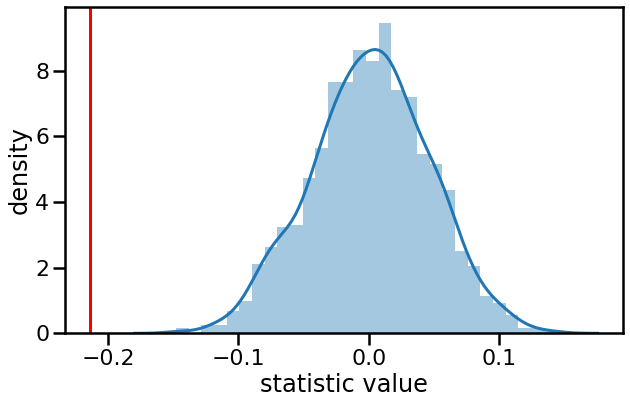

In [78]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(null_diff, kde=True, bins='auto', ax=ax)
plt.axvline(x=fisher_obs_statistic, color='red')
ax.set_xlabel('statistic value')
ax.set_ylabel('density')
plt.savefig('fisher_null_original.pdf', bbox_inches='tight')

In [79]:
# let's get the fisher exact p-value
np.mean(np.abs(null_diff)>abs(fisher_obs_statistic))

0.0

And now let us compute a confidence interval!!!

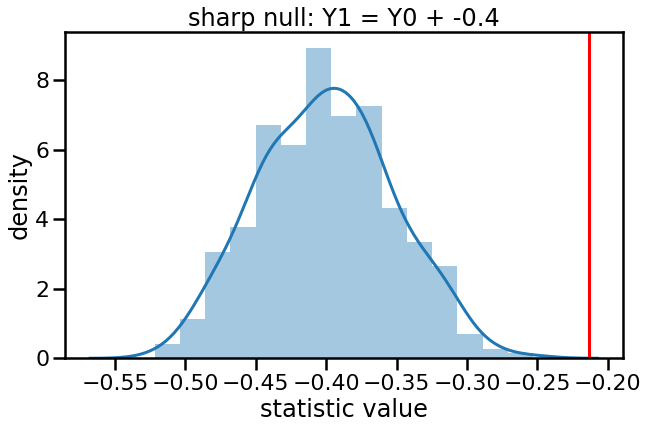

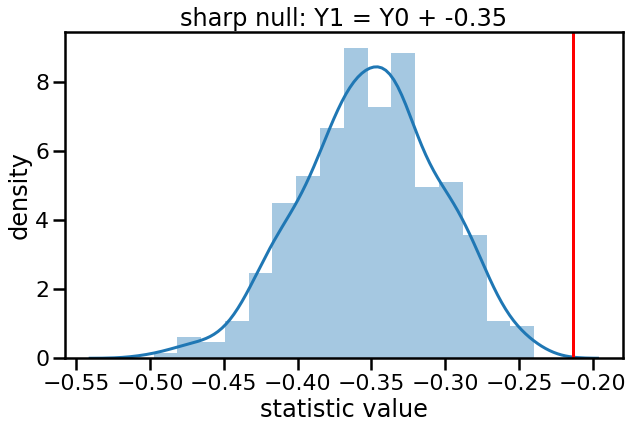

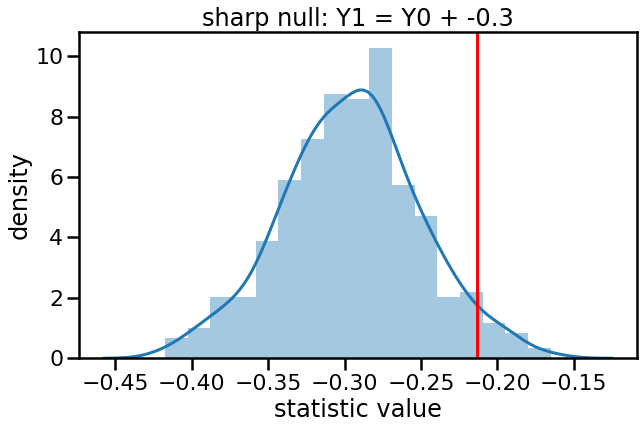

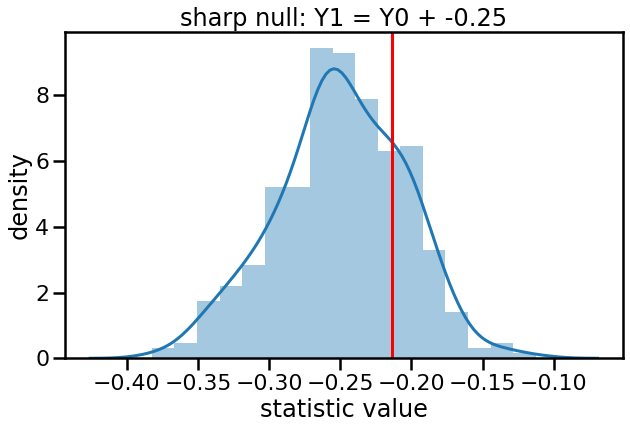

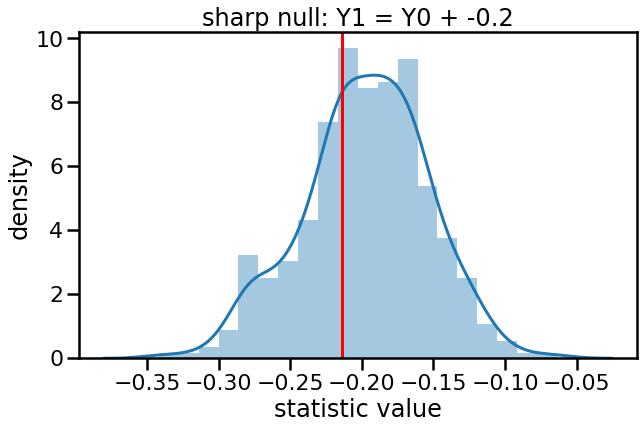

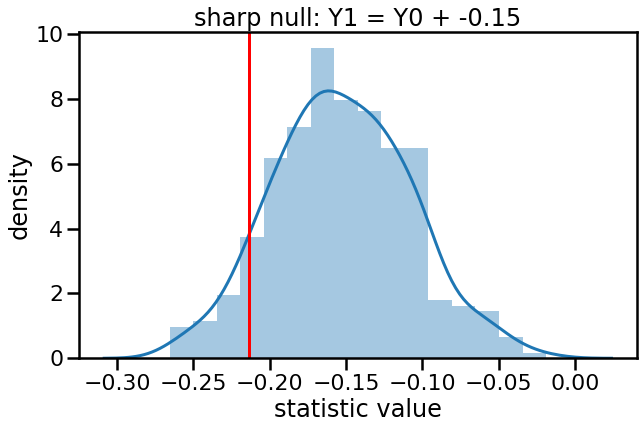

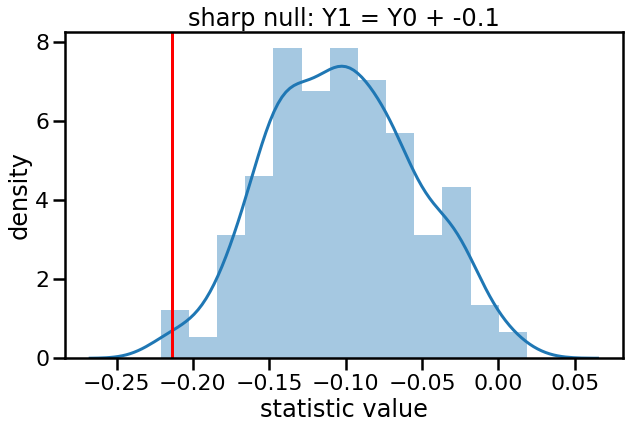

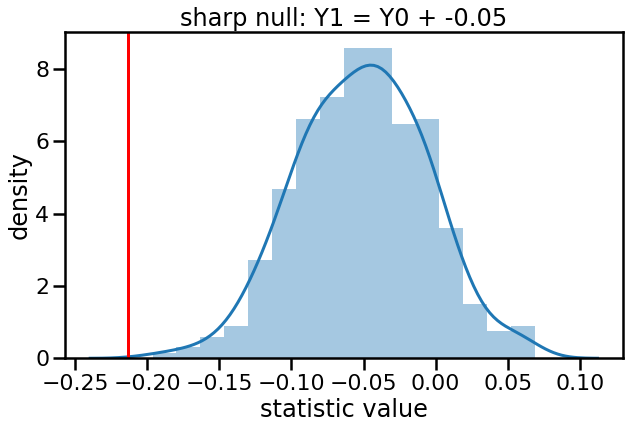

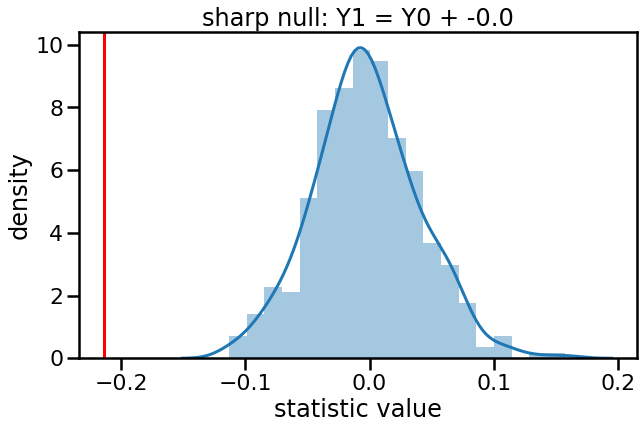

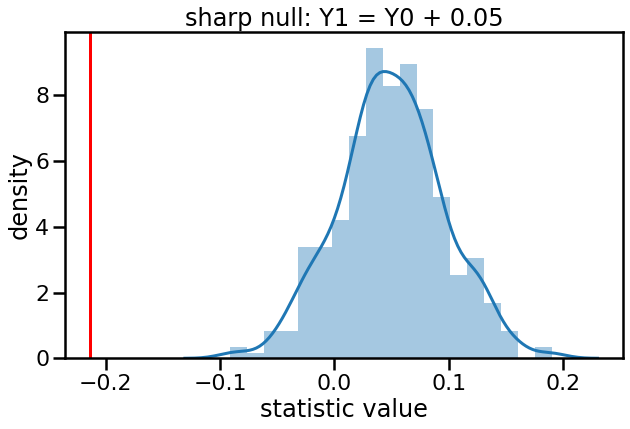

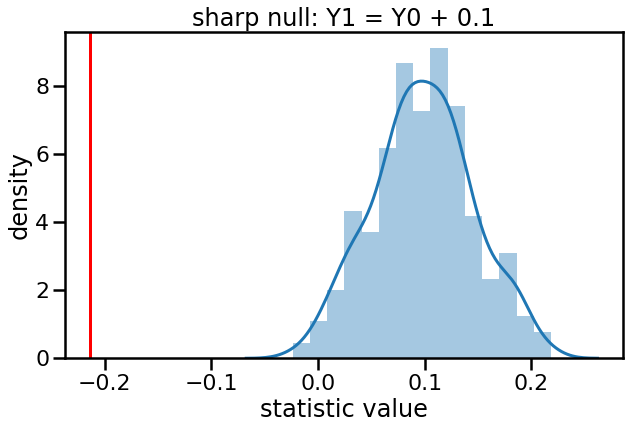

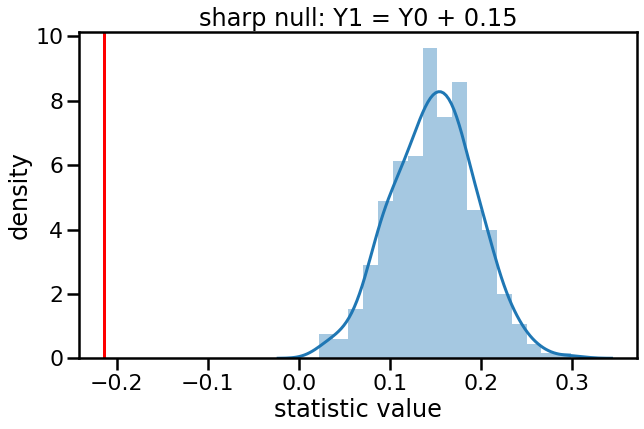

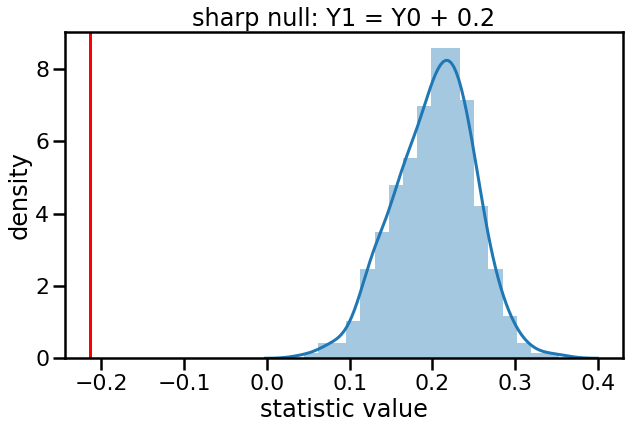

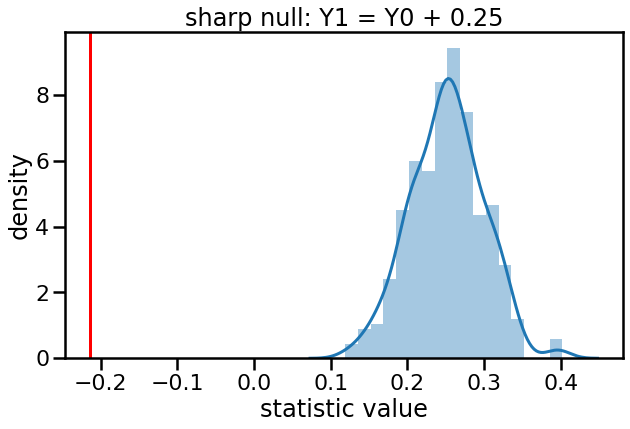

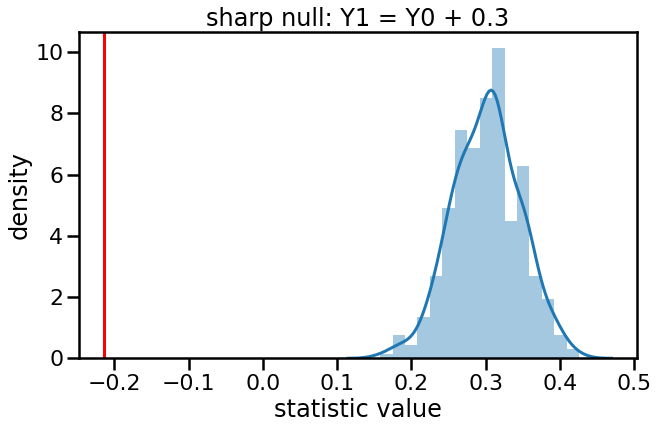

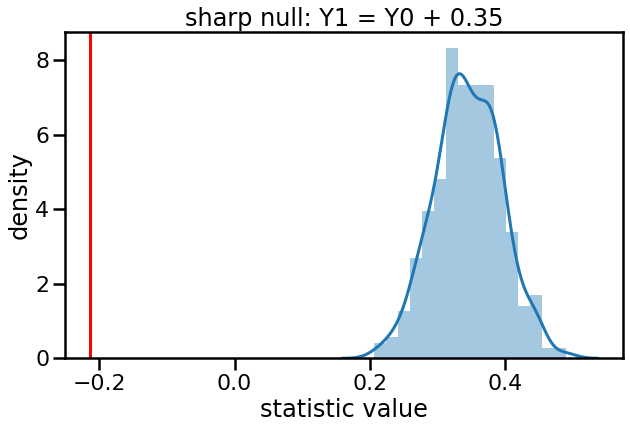

In [81]:
c_to_test = np.round(np.arange(-0.4, 0.4, 0.05), 3)
pvalues = np.zeros(len(c_to_test))
rg = np.random.default_rng(1007)
for cidx, cval in enumerate(c_to_test):
    
    judges = judges.assign(y0_fisher_null_c = judges.y0_obs)
    judges.loc[judges.treatment==1, 'y0_fisher_null_c'] = judges.loc[judges.treatment==1, 'eidretain'] - cval

    judges = judges.assign(y1_fisher_null_c = judges.y0_fisher_null_c + cval)

    fisher_statistic_c = judges[judges['treatment']==1].eidretain.mean() - judges[judges['treatment']==0].eidretain.mean()
    Niter= 400
    
    null_diff = np.zeros(Niter)
    for i in range(Niter):
      # permute the treatment variable with the function permutation from numpy.random
      judges = judges.assign(T_permute=rg.permutation(judges['treatment']))
      null_diff[i] = judges[judges['T_permute']==1].y1_fisher_null_c.mean() - judges[judges['T_permute']==0].y0_fisher_null_c.mean()
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(null_diff, kde=True, bins='auto', ax=ax)
    plt.axvline(x=fisher_obs_statistic, color='red')
    ax.set_xlabel('statistic value')
    ax.set_ylabel('density')
    ax.set_title('sharp null: Y1 = Y0 + {}'.format(cval))
    plt.savefig('fisher_c_{}.pdf'.format(cidx), bbox_inches='tight')
    pvalues[cidx] = np.mean(np.abs(null_diff - cval)>abs(fisher_obs_statistic - cval))

In [83]:
print(pd.DataFrame(zip(c_to_test, pvalues), columns=['C', 'p-value']).to_latex())

\begin{tabular}{lrr}
\toprule
{} &     C &  p-value \\
\midrule
0  & -0.40 &   0.0000 \\
1  & -0.35 &   0.0025 \\
2  & -0.30 &   0.0675 \\
3  & -0.25 &   0.4375 \\
4  & -0.20 &   0.7600 \\
5  & -0.15 &   0.1475 \\
6  & -0.10 &   0.0100 \\
7  & -0.05 &   0.0000 \\
8  & -0.00 &   0.0000 \\
9  &  0.05 &   0.0000 \\
10 &  0.10 &   0.0000 \\
11 &  0.15 &   0.0000 \\
12 &  0.20 &   0.0000 \\
13 &  0.25 &   0.0000 \\
14 &  0.30 &   0.0000 \\
15 &  0.35 &   0.0000 \\
\bottomrule
\end{tabular}



In [121]:
res = []
for party in judges.dropna(subset=['party']).party.unique():
    sub_judges = judges[judges.party==party]
    sub_ate = sub_judges[sub_judges.treatment==1].eidretain.mean() - sub_judges[sub_judges.treatment==0].eidretain.mean()
    
    var_ate_hat = sub_judges[sub_judges.treatment==1].eidretain.var() / len(sub_judges[judges.treatment==1]) + \
                sub_judges[sub_judges.treatment==0].eidretain.var() / len(sub_judges[judges.treatment==0])
    se_ate_hat = np.sqrt(var_ate_hat)
    ci_95 = [ate_hat - sps.norm.ppf(.975)*se_ate_hat,
         ate_hat + sps.norm.ppf(.975)*se_ate_hat]
    res.append([party, len(sub_judges), sub_ate] + ci_95)

/Users/JudithAbecassis/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/JudithAbecassis/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [124]:
res_df = pd.DataFrame(res, columns=['party', 'nb_units', 'CATE', 'ci_low', 'ci_high'])

order = ['Strong Republican	', 'Not so strong Republican', 'Republican Leaner',
    'Independent/Other', 'Democrat Leaner', 'Not so strong Democrat', 'Strong Democrat']
res_df = res_df.dropna(inplace=False)
res_df = res_df.assign(party=pd.Categorical(res_df.party, categories=order, ordered=True))
res_df = res_df.sort_values('party')

In [125]:
print(res_df.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &                     party &  nb\_units &      CATE &    ci\_low &   ci\_high \\
\midrule
2 &  Not so strong Republican &       161 &  0.216249 & -0.432636 &  0.005362 \\
1 &         Republican Leaner &        93 &  0.231401 & -0.510514 &  0.083240 \\
3 &         Independent/Other &       157 & -0.021759 & -0.446959 &  0.019685 \\
6 &           Democrat Leaner &       169 & -0.379336 & -0.406446 & -0.020828 \\
4 &    Not so strong Democrat &       257 & -0.399224 & -0.398405 & -0.028869 \\
0 &           Strong Democrat &       288 & -0.723338 & -0.377433 & -0.049841 \\
5 &                       NaN &        93 &  0.649669 & -0.516073 &  0.088799 \\
\bottomrule
\end{tabular}



In [128]:
(res_df.nb_units.values * res_df.CATE.values).sum() / res_df.nb_units.sum()

-0.21485267373064418

In [116]:
judges.head()

,ID,age,gender,party,eidretain,eidideology,treatment,respideol,distideol,educ,y1_obs,y0_obs,y0_fisher_null_0,y1_fisher_null_0,T_permute,y0_fisher_null_c,y1_fisher_null_c
0,R_poaUMG1G7YLrKKt,25-34,Female,Strong Democrat,1.0,7.0,1.0,2.0,5.0,Some college,1.0,NaN,1.0,1.0,1.0,0.65,1.00
1,R_1JDgtTKveX3DbOt,45-54,Female,Republican Leaner,2.0,6.0,1.0,5.0,1.0,Associate degree,2.0,NaN,2.0,2.0,1.0,1.65,2.00
2,R_2Yb8AZwaXDyvkId,25-34,Female,Strong Democrat,2.0,5.0,1.0,2.0,3.0,Some college,2.0,NaN,2.0,2.0,1.0,1.65,2.00
3,R_RV5eAo3HEWPmI7L,18-24,Female,Not so strong Republican,3.0,5.0,0.0,6.0,1.0,Some college,NaN,3.0,3.0,3.0,0.0,3.00,3.35
4,R_2y1qt5Wn0OfgZSj,25-34,Female,Independent/Other,3.0,5.0,0.0,4.0,1.0,Associate degree,NaN,3.0,3.0,3.0,0.0,3.00,3.35


In [129]:
res = []

sub_judges = judges[np.abs(judges.distideol)<=1]
sub_ate = sub_judges[sub_judges.treatment==1].eidretain.mean() - sub_judges[sub_judges.treatment==0].eidretain.mean()

var_ate_hat = sub_judges[sub_judges.treatment==1].eidretain.var() / len(sub_judges[judges.treatment==1]) + \
            sub_judges[sub_judges.treatment==0].eidretain.var() / len(sub_judges[judges.treatment==0])
se_ate_hat = np.sqrt(var_ate_hat)
ci_95 = [ate_hat - sps.norm.ppf(.975)*se_ate_hat,
     ate_hat + sps.norm.ppf(.975)*se_ate_hat]
res.append(['small_dist_ideol', len(sub_judges), sub_ate] + ci_95)


sub_judges = judges[np.abs(judges.distideol)>1]
sub_ate = sub_judges[sub_judges.treatment==1].eidretain.mean() - sub_judges[sub_judges.treatment==0].eidretain.mean()

var_ate_hat = sub_judges[sub_judges.treatment==1].eidretain.var() / len(sub_judges[judges.treatment==1]) + \
            sub_judges[sub_judges.treatment==0].eidretain.var() / len(sub_judges[judges.treatment==0])
se_ate_hat = np.sqrt(var_ate_hat)
ci_95 = [ate_hat - sps.norm.ppf(.975)*se_ate_hat,
     ate_hat + sps.norm.ppf(.975)*se_ate_hat]
res.append(['big_dist_ideol', len(sub_judges), sub_ate] + ci_95)

/Users/JudithAbecassis/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/JudithAbecassis/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/JudithAbecassis/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/JudithAbecassis/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [130]:
res_df = pd.DataFrame(res, columns=['ideology_distance', 'nb_units', 'CATE', 'ci_low', 'ci_high'])

In [131]:
res_df

,ideology_distance,nb_units,CATE,ci_low,ci_high
0,small_dist_ideol,505,0.257037,-0.338070,-0.089204
1,big_dist_ideol,674,-0.459619,-0.318991,-0.108283


In [132]:
(res_df.nb_units.values * res_df.CATE.values).sum() / res_df.nb_units.sum()

-0.1526546234480209